## Coordinate System
Coordinate system in 6 Dof

In [1]:
import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sympy as sp
import sympy.physics.mechanics as me
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from substitute_dynamic_symbols import substitute_dynamic_symbols, find_name, find_derivative_name, lambdify, find_derivatives


In [3]:
phi,theta,psi = sp.symbols('phi theta psi')


p_x = sp.Symbol('p_x')
p_y = sp.Symbol('p_y')
p_z = sp.Symbol('p_z')



In [4]:
N = me.ReferenceFrame('N')

In [5]:
#M = N.orientnew('M', 'Axis', [psi, N.z])
#O = me.ReferenceFrame('O')
#O.orient(M,'Axis',[phi,M.x])
#
#S = me.ReferenceFrame('S')
#S.orient(O,'Axis',[theta,M.y])





In [6]:
S = N.orientnew('S','Body',[psi,theta,phi],'ZYX')

In [7]:
S.dcm(N)

Matrix([
[                             cos(psi)*cos(theta),                               sin(psi)*cos(theta),         -sin(theta)],
[sin(phi)*sin(theta)*cos(psi) - sin(psi)*cos(phi),  sin(phi)*sin(psi)*sin(theta) + cos(phi)*cos(psi), sin(phi)*cos(theta)],
[sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi), -sin(phi)*cos(psi) + sin(psi)*sin(theta)*cos(phi), cos(phi)*cos(theta)]])

In [8]:
P = p_x*S.x + p_y*S.y + p_z*S.z

In [9]:
P.to_matrix(N)

Matrix([
[ p_x*cos(psi)*cos(theta) + p_y*(sin(phi)*sin(theta)*cos(psi) - sin(psi)*cos(phi)) + p_z*(sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi))],
[p_x*sin(psi)*cos(theta) + p_y*(sin(phi)*sin(psi)*sin(theta) + cos(phi)*cos(psi)) + p_z*(-sin(phi)*cos(psi) + sin(psi)*sin(theta)*cos(phi))],
[                                                                       -p_x*sin(theta) + p_y*sin(phi)*cos(theta) + p_z*cos(phi)*cos(theta)]])

In [10]:
args = [
    p_x,
    p_y,
    p_z,
    phi,
    theta,
    psi,
]

rotation_lambda = sp.lambdify(args,P.to_matrix(N),modules='numpy')

In [11]:
def rotate(p,phi_=0,theta_=0,psi_=0):

    args = [
        (p_x,p[0]),
        (p_y,p[1]),
        (p_z,p[2]),
        (phi,phi_),
        (theta,theta_),
        (psi,psi_)
    ]
    
    return P.to_matrix(N).subs(args)

In [12]:
p_s = [1,0,0]
angles = [0,0,0]
p_n = rotate(p=p_s,phi_=angles[0],theta_=angles[1],psi_=angles[2])

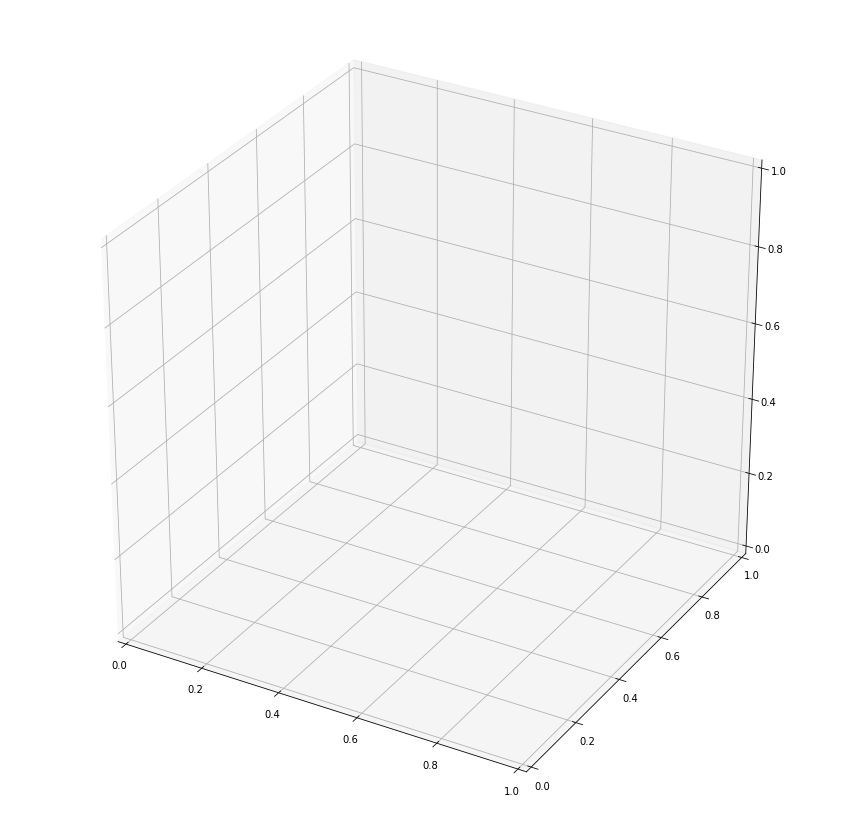

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from ipywidgets import interactive

fig = plt.figure();
fig.set_size_inches(15,15);
ax = plt.axes(projection='3d');

In [14]:
def plot(phi, theta, psi):
       
    
    angles = np.deg2rad([phi, theta, psi])
    
    ax.clear()
    p_x = rotate(p=[1,0,0],phi_=angles[0],theta_=angles[1],psi_=angles[2])
    ax.plot([0,p_x[0]],[0,p_x[1]],[0,p_x[2]])
    ax.text(p_x[0],p_x[1],p_x[2],'X')
    
    p_y = rotate(p=[0,1,0],phi_=angles[0],theta_=angles[1],psi_=angles[2])
    ax.plot([0,p_y[0]],[0,p_y[1]],[0,p_y[2]])
    ax.text(p_y[0],p_y[1],p_y[2],'Y')

    p_z = rotate(p=[0,0,1],phi_=angles[0],theta_=angles[1],psi_=angles[2])
    ax.plot([0,p_z[0]],[0,p_z[1]],[0,p_z[2]])
    ax.text(p_z[0],p_z[1],p_z[2],'Z')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(220, 260)
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_zlim(-1,1)
    
    display(fig);
    #fig.canvas.draw_idle();
   
  

interactive_plot = interactive(plot, phi=(-90, 90, 1), theta=(-90, 90, 1), psi=(-90, 90,1 ),)

interactive_plot

interactive(children=(IntSlider(value=0, description='phi', max=90, min=-90), IntSlider(value=0, description='…

In [17]:
import ipyvolume as ipv
import ipywidgets as widgets

class Scene:
    def __init__(self):
        
        self.figure = ipv.figure(animation=0.,animation_exponent=0,width=800,height=800)
        
        
        R = 1.
        ipv.xlim(0, R)
        ipv.ylim(0, R)
        ipv.zlim(0, R)
        ipv.style.box_off()
        
        p=[1.,0.,0.]
        x = [0.,p[0]]
        y = [0.,p[1]]
        z = [0.,p[2]]
        self.x_axis = ipv.plot(x, y, z, color='red')
        
        p=[0,1.,0.]
        x = [0.,p[0]]
        y = [0.,p[1]]
        z = [0.,p[2]]
        self.y_axis = ipv.plot(x, y, z, color='green')
        
        p=[0.,0.,1.]
        x = [0.,p[0]]
        y = [0.,p[1]]
        z = [0.,p[2]]
        self.z_axis = ipv.plot(x, y, z, color='blue')
               
        
        ipv.pylab.view(azimuth=180, elevation=60, distance=2)
        ipv.show()
        
        self.ui = widgets.interact(self.update, phi=(-180.,180.), theta=(-180., 180.), psi=(-180., 180.))
        
    def update(self, phi, theta, psi):
        print("update with", phi, theta, psi)
        
        angles = np.deg2rad([phi, theta, psi])
        
        p_x = rotate(p=[1,0,0],phi_=angles[0],theta_=angles[1],psi_=angles[2])                
        self.x_axis.x = [0.,float(p_x[0])]
        self.x_axis.y = [0.,float(p_x[1])]
        self.x_axis.z = [0.,float(p_x[2])]

        p_y = rotate(p=[0,1,0],phi_=angles[0],theta_=angles[1],psi_=angles[2])                
        self.y_axis.x = [0.,float(p_y[0])]
        self.y_axis.y = [0.,float(p_y[1])]
        self.y_axis.z = [0.,float(p_y[2])]

        p_z = rotate(p=[0,0,1],phi_=angles[0],theta_=angles[1],psi_=angles[2])                
        self.z_axis.x = [0.,float(p_z[0])]
        self.z_axis.y = [0.,float(p_z[1])]
        self.z_axis.z = [0.,float(p_z[2])]


scene = Scene()

interactive(children=(FloatSlider(value=0.0, description='phi', max=180.0, min=-180.0), FloatSlider(value=0.0,…

In [21]:
N = 10
L = 1
B = 0.1
T = 0.05

x = np.linspace(0,L,N)
y = np.linspace(0,B,N)
z = np.linspace(0,T,N)

X,Y = np.meshgrid(x,y)
Z=np.array(Y)
Y*=(L-X)**(0.4)



ipv.figure()
port = ipv.plot_mesh(X, Y, Z, wireframe=True)
stbd = ipv.plot_mesh(X, -Y, Z, wireframe=True)
ipv.squarelim()
ipv.show()

In [19]:
def rotate2(p,phi_=0,theta_=0,psi_=0):
    
    args = {
        'p_x':p[0],
        'p_y':p[1],
        'p_z':p[2],
        'phi':phi_,
        'theta':theta_,
        'psi':psi_
        }
    
    result = rotation_lambda(**args)
    return result.reshape(3,result.shape[2]).T
    

In [34]:
class Scene:
    def __init__(self):
        
        self.figure = ipv.figure(animation=0.,animation_exponent=0,width=800,height=800)
        
        
        R = 1.
        ipv.xlim(0, R)
        ipv.ylim(0, R)
        ipv.zlim(0, R)
        ipv.style.box_off()
        
        self.load_ship_geometry()
        
        self.port = ipv.plot_mesh(self.X, self.Y_port, self.Z, wireframe=False)
        self.stbd = ipv.plot_mesh(self.X, self.Y_starboard, self.Z, wireframe=False)

        ipv.pylab.view(azimuth=180, elevation=60, distance=1)
        ipv.show()
        
        self.ui = widgets.interact(self.update, phi=(-180.,180.), theta=(-180., 180.), psi=(-180., 180.))
        
    def load_ship_geometry(self):
        
        self.N = 10
        L = 1
        B = 0.1
        T = 0.05
        
        x = np.linspace(0,L,self.N)
        y = np.linspace(0,B,self.N)
        z = np.linspace(0,T,self.N)
        
        X,Y = np.meshgrid(x,y)
        Z=np.array(Y)
        Y*=(L-X)**(0.4)
        
        self.X = X
        self.Z = Z
        self.Y_port = Y
        self.Y_starboard = -Y
        
    def update(self, phi, theta, psi):
        print("update with", phi, theta, psi)
        
        angles = np.deg2rad([phi, theta, psi])
        
        X = self.X.flatten()
        Y = self.Y_starboard.flatten()
        Z = self.Z.flatten()
        result = rotate2(p=[X,Y,Z],phi_=angles[0],theta_=angles[1],psi_=angles[2])
        X_ = result[:,0]
        Y_ = result[:,1]
        Z_ = result[:,2]
        self.stbd.x = X_
        self.stbd.y = Y_
        self.stbd.z = Z_
        
        X = self.X.flatten()
        Y = self.Y_port.flatten()
        Z = self.Z.flatten()
        result = rotate2(p=[X,Y,Z],phi_=angles[0],theta_=angles[1],psi_=angles[2])
        X_ = result[:,0]
        Y_ = result[:,1]
        Z_ = result[:,2]
        self.port.x = X_
        self.port.y = Y_
        self.port.z = Z_
               
                

scene = Scene()

interactive(children=(FloatSlider(value=0.0, description='phi', max=180.0, min=-180.0), FloatSlider(value=0.0,…